# Assignment 8. PCA(Principal Component Analysis) 

#### Dataset: wine.csv

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
# Loading dataset and Renaming the columns based on their features.

columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'dilution_of_wines', 'proline']

df = pd.read_csv('Datasets/wine.csv', names=columns, header=0)
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,dilution_of_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### EDA & Data Preprocessing 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  dilution_of_wines     178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# Checking for null values
df.isna().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
dilution_of_wines       0
proline                 0
dtype: int64

In [5]:
# Checking predefined no.of cluster
df['class'].nunique()

3

In [6]:
# Data distribued in clusters
df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

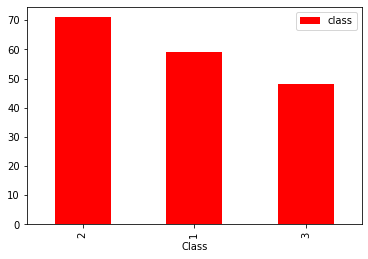

In [7]:
#Plot for class
df["class"].value_counts().plot.bar(color='Red')
plt.xlabel("Class")
plt.legend()

In [8]:
# Using the standard scaler method to get the values converted into integers.
X = df.iloc[:, 1:].values
from sklearn.preprocessing import StandardScaler
X_normal = scale(X)

In [9]:
X_normal.shape

(178, 13)

In [10]:
X_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Building PCA

In [11]:
''' Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result 
of the clustering. '''
pca = PCA()
principalComponents = pca.fit_transform(X_normal)

In [12]:
principalComponents

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [13]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset = pd.DataFrame(data = principalComponents, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [14]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [15]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [16]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

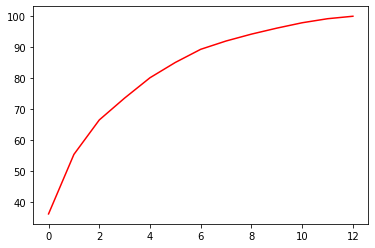

In [17]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

### As our problem is suggesting to use first 3 principal components for further computation,  Extracting the three features from PCA_dataset

In [18]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [19]:
# Creating dataframe for further clusering algorithms
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df.head()

,component1,component2,component3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


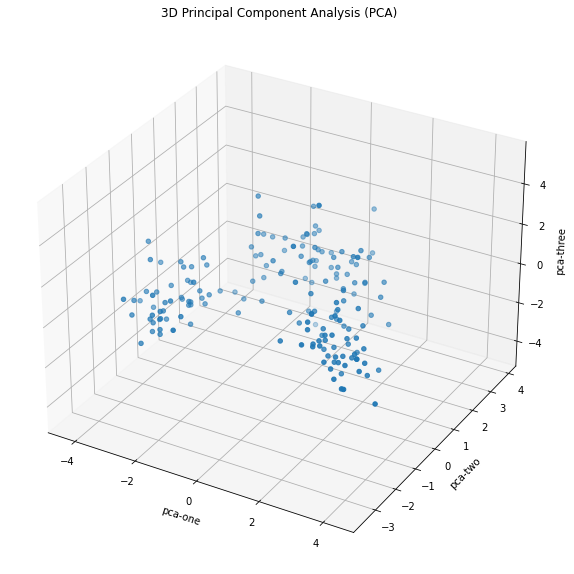

In [20]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Performing Heirarchical Agglomerative Clustering

In [21]:
#  Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca_df_normal = scaler.fit_transform(pca_df)
print(pca_df_normal)

[[0.88409355 0.28044707 0.44502757]
 [0.75524083 0.52098937 0.25765258]
 [0.79099786 0.33626383 0.56068773]
 [0.93533214 0.10271162 0.44397497]
 [0.6155344  0.35810263 0.66580576]
 [0.85308182 0.18853559 0.39833717]
 [0.7831255  0.31681056 0.36332375]
 [0.73778236 0.25804241 0.47644818]
 [0.79031526 0.35157211 0.28338035]
 [0.81856406 0.36898588 0.36260348]
 [0.9030599  0.2995525  0.41914796]
 [0.70232687 0.39300963 0.34179568]
 [0.7440692  0.38438229 0.37460304]
 [0.9005487  0.32279689 0.3404465 ]
 [1.         0.19211296 0.33444109]
 [0.76637997 0.25078783 0.48366041]
 [0.75087591 0.16079663 0.54547303]
 [0.71910927 0.25500921 0.54176564]
 [0.91030363 0.13493476 0.4128317 ]
 [0.74070149 0.33220437 0.4451275 ]
 [0.86171036 0.36932981 0.42497329]
 [0.62457173 0.44313012 0.55606991]
 [0.7931488  0.48828916 0.43030582]
 [0.68955378 0.54574762 0.47620682]
 [0.70312085 0.51879034 0.55136962]
 [0.61334326 0.34851312 0.84648431]
 [0.7047153  0.38296507 0.45298678]
 [0.64189357 0.48801387 0.32

In [22]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [23]:
y=pd.DataFrame(H_clusters.fit_predict(pca_df_normal),columns=['clustersid_H'])
y['clustersid_H'].value_counts()

0    66
2    65
1    47
Name: clustersid_H, dtype: int64

## Performing K-MEANS Clustering

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

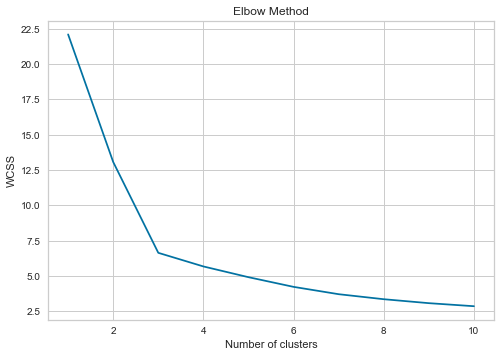

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
#Build Cluster algorithm

KM_clusters = KMeans(3, random_state=42)
KM_clusters.fit(pca_df_normal)

KMeans(n_clusters=3, random_state=42)

In [27]:
y=pd.DataFrame(KM_clusters.fit_predict(pca_df_normal),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

2    68
0    61
1    49
Name: clusterid_Kmeans, dtype: int64

### Preparing Actual Vs. Predicted Clusering Data

In [28]:
wine_class = df['class']
wine_class = pd.Series(wine_class)

In [29]:
clustersid_HC = H_clusters.labels_
clustersid_HC = pd.Series(clustersid_HC)

In [30]:
clusterid_Kmeans = KM_clusters.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)

In [31]:
pred_df = pd.concat([wine_class, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_df

,class,0,1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,3,1,1
174,3,1,1
175,3,1,1
176,3,1,1
